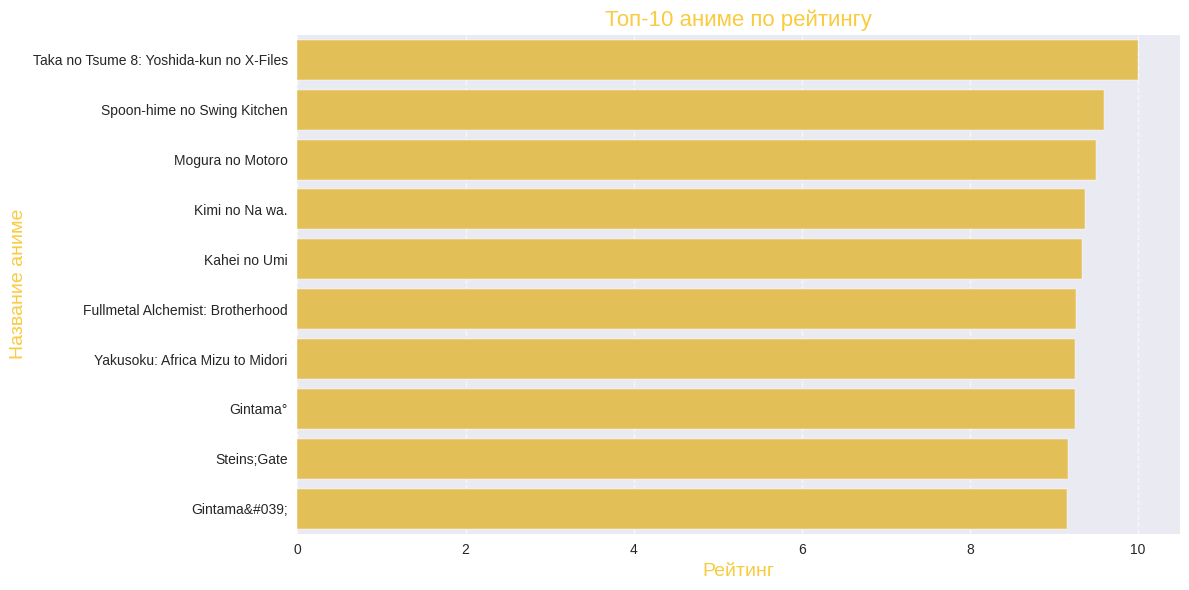

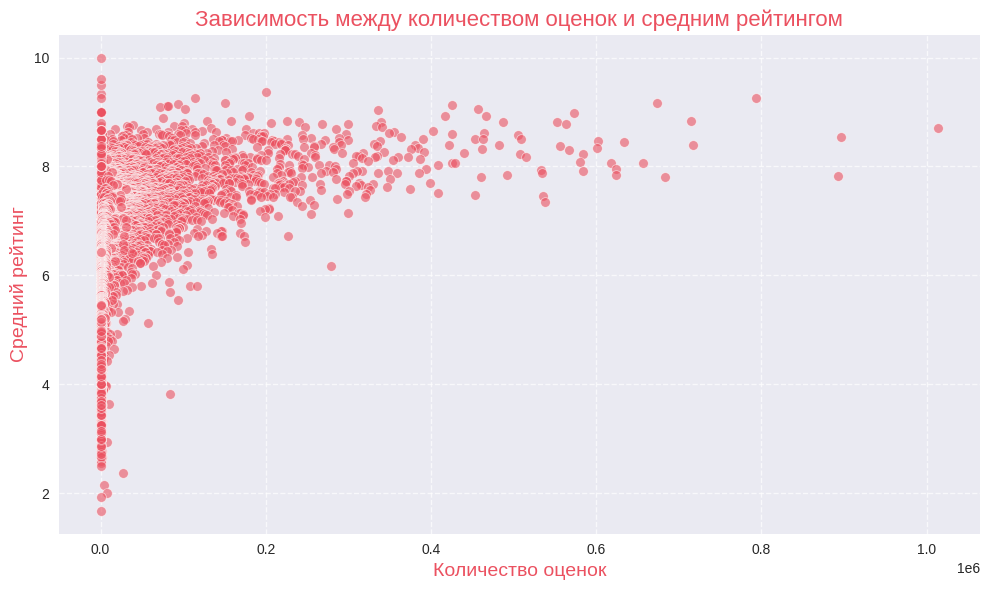

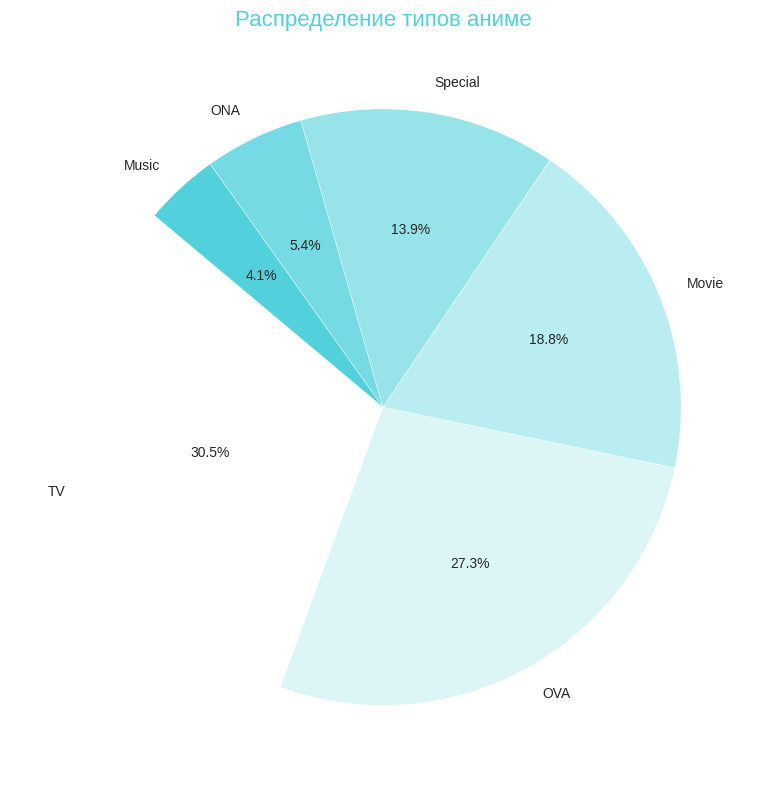

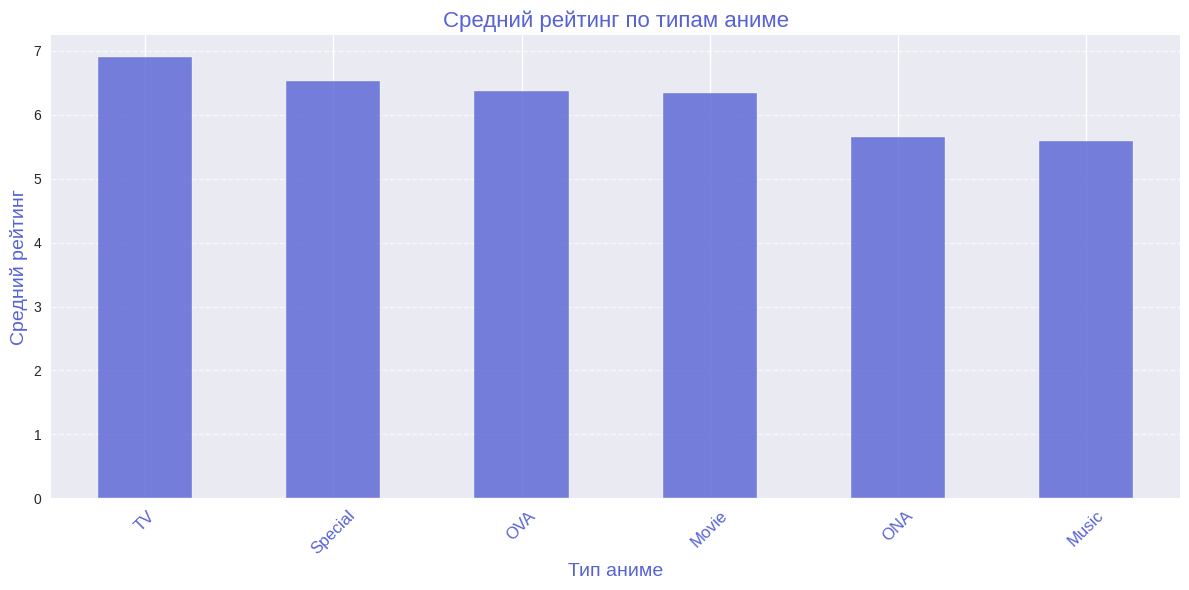

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

anime_df = pd.read_csv('anime.csv')

anime_df.dropna(inplace=True)

colors = ["#071013", "#EB5160", "#52D1DC", "#5762D5", "#F9CB40"]

sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')

# (01) Столбчатая диаграмма: Топ-10 аниме по рейтингу
top_anime = anime_df.sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='name', data=top_anime, color=colors[4])
plt.title('Топ-10 аниме по рейтингу', fontsize=16, color=colors[4])
plt.xlabel('Рейтинг', fontsize=14, color=colors[4])
plt.ylabel('Название аниме', fontsize=14, color=colors[4])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# (02) Точечная диаграмма: Зависимость между количеством оценок и средним рейтингом
anime_df['members'] = anime_df['members'].astype(int)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='members', y='rating', data=anime_df, alpha=0.6, color=colors[1])
plt.title('Зависимость между количеством оценок и средним рейтингом', fontsize=16, color=colors[1])
plt.xlabel('Количество оценок', fontsize=14, color=colors[1])
plt.ylabel('Средний рейтинг', fontsize=14, color=colors[1])
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# (03) Круговая диаграмма: Распределение типов аниме
type_counts = anime_df['type'].value_counts()

base_color = colors[2]
cmap = LinearSegmentedColormap.from_list("gradient", ["white", base_color], N=len(type_counts))
gradient_colors = [cmap(i) for i in np.linspace(0, 1, len(type_counts))]

plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=gradient_colors)
plt.title('Распределение типов аниме', fontsize=16, color=base_color)
plt.tight_layout()
plt.show()

# (04) Линейчатая диаграмма: Средний рейтинг по типам аниме
type_rating = anime_df.groupby('type')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
type_rating.plot(kind='bar', color=colors[3], alpha=0.8)
plt.title('Средний рейтинг по типам аниме', fontsize=16, color=colors[3])
plt.xlabel('Тип аниме', fontsize=14, color=colors[3])
plt.ylabel('Средний рейтинг', fontsize=14, color=colors[3])
plt.xticks(rotation=45, fontsize=12, color=colors[3])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()